---
# 01 Fashion MNIST 모델
---

---
## 1) 데이터 로드
---

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")


전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [7]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16216\947791899.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


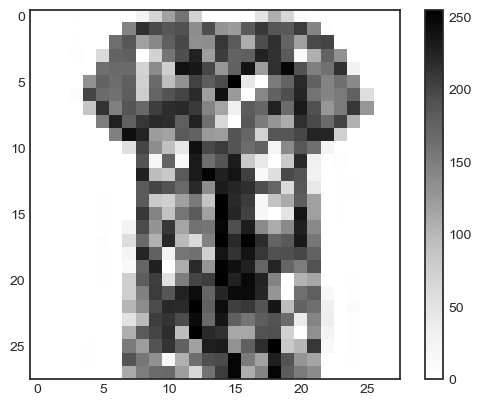

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

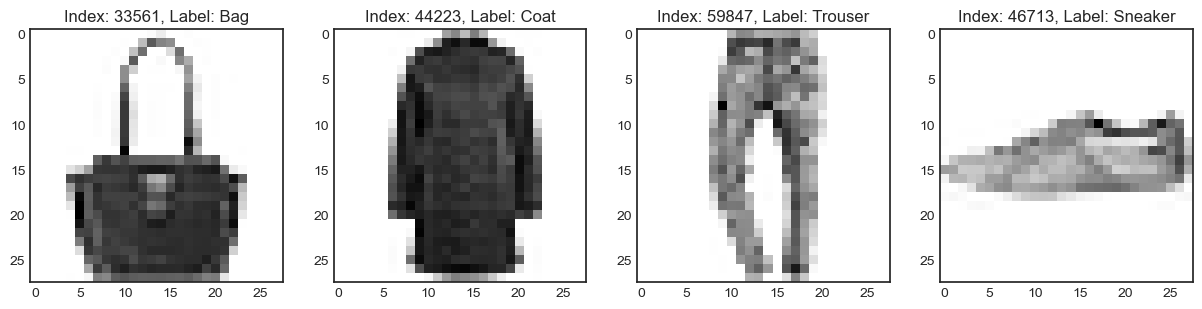

In [13]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

---
## 2) 데이터 전처리
---

In [14]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [17]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [18]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [19]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [20]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

---
## 3) 모델 구성
---

In [21]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
## 4) 모델 컴파일 및 학습
---

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60


83/83 [==============================] - 16s 78ms/step - loss: 2.1985 - accuracy: 0.3403 - val_loss: 2.0377 - val_accuracy: 0.4508
Epoch 2/60
83/83 [==============================] - 3s 33ms/step - loss: 1.9193 - accuracy: 0.5976 - val_loss: 1.8145 - val_accuracy: 0.6184
Epoch 3/60
83/83 [==============================] - 3s 33ms/step - loss: 1.7190 - accuracy: 0.6636 - val_loss: 1.6335 - val_accuracy: 0.6070
Epoch 4/60
83/83 [==============================] - 3s 33ms/step - loss: 1.5570 - accuracy: 0.6776 - val_loss: 1.4915 - val_accuracy: 0.6686
Epoch 5/60
83/83 [==============================] - 3s 33ms/step - loss: 1.4282 - accuracy: 0.6904 - val_loss: 1.3764 - val_accuracy: 0.6700
Epoch 6/60
83/83 [==============================] - 3s 34ms/step - loss: 1.3247 - accuracy: 0.6993 - val_loss: 1.2810 - val_accuracy: 0.6883
Epoch 7/60
83/83 [==============================] - 3s 38ms/step - loss: 1.2404 - accuracy: 0.7049 - val_loss: 1.2027 - val_accuracy: 0.7082
Epoch 8/60

83/83 [==============================] - 3s 31ms/step - loss: 0.6199 - accuracy: 0.7866 - val_loss: 0.6247 - val_accuracy: 0.7843
Epoch 56/60
83/83 [==============================] - 3s 32ms/step - loss: 0.6173 - accuracy: 0.7876 - val_loss: 0.6224 - val_accuracy: 0.7860
Epoch 57/60
83/83 [==============================] - 3s 38ms/step - loss: 0.6147 - accuracy: 0.7885 - val_loss: 0.6209 - val_accuracy: 0.7853
Epoch 58/60
83/83 [==============================] - 3s 38ms/step - loss: 0.6122 - accuracy: 0.7896 - val_loss: 0.6175 - val_accuracy: 0.7868
Epoch 59/60
83/83 [==============================] - 3s 38ms/step - loss: 0.6097 - accuracy: 0.7899 - val_loss: 0.6157 - val_accuracy: 0.7876
Epoch 60/60
83/83 [==============================] - 3s 33ms/step - loss: 0.6072 - accuracy: 0.7912 - val_loss: 0.6132 - val_accuracy: 0.7864


In [24]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

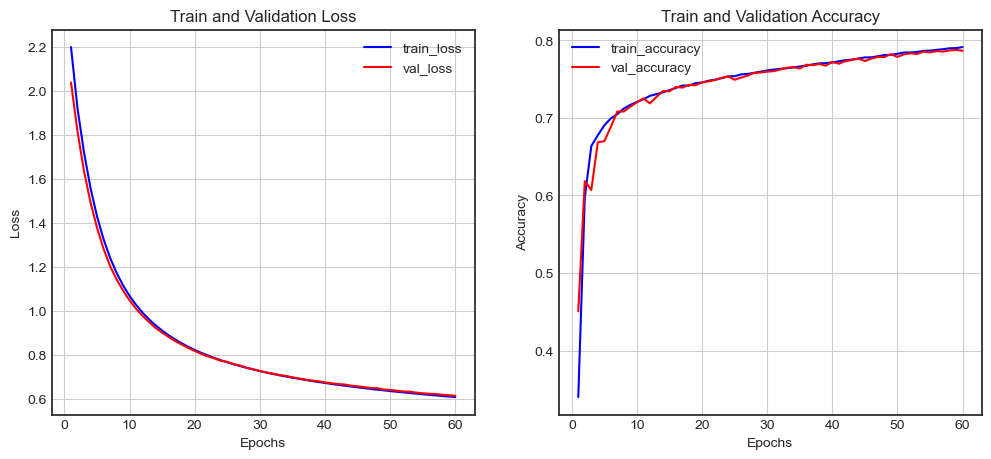

In [25]:
show_history(history)

---
## 5) 모델 평가 및 예측
---

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6259 - accuracy: 0.7800


[0.6259225606918335, 0.7799999713897705]

In [27]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 2s 5ms/step
[1.4367293e-02 9.2752135e-01 4.6900143e-03 1.8657945e-02 2.7080519e-02
 4.3386521e-05 7.4802041e-03 4.7474408e-05 9.2743445e-05 1.9098365e-05]
1
Trouser


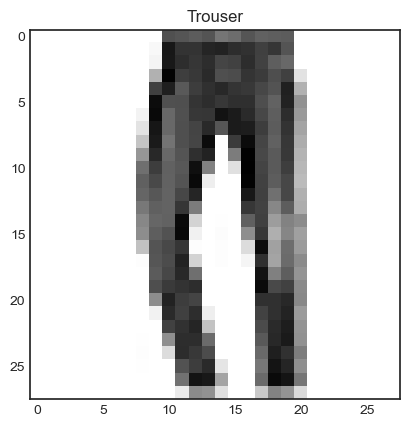

In [28]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [42]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [43]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

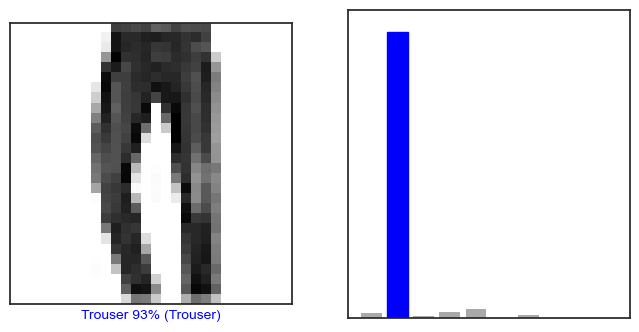

In [44]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

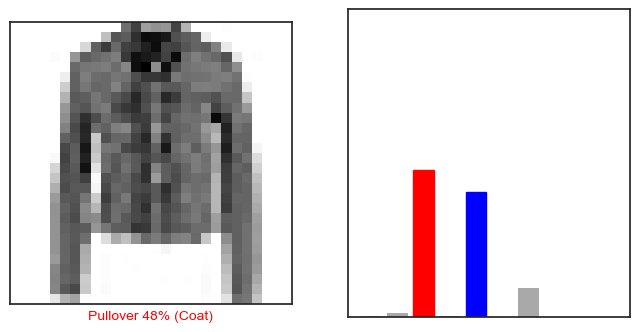

In [45]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

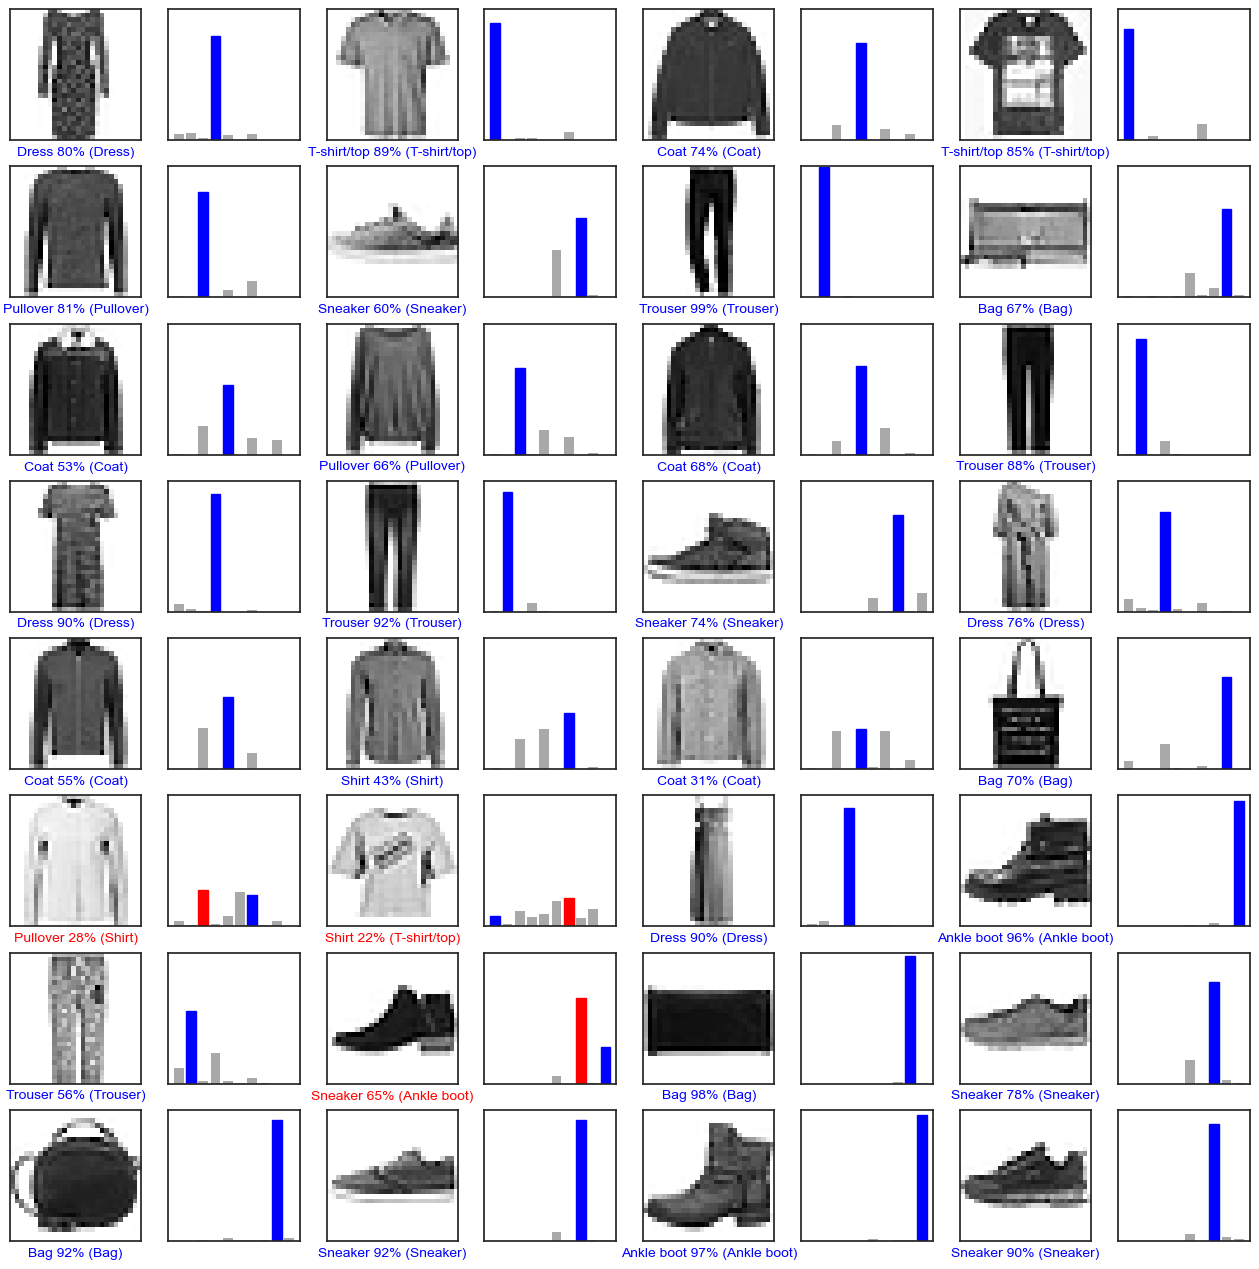

In [46]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [47]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.81      0.76      1000
     Trouser       0.97      0.91      0.94      1000
    Pullover       0.69      0.62      0.66      1000
       Dress       0.75      0.84      0.79      1000
        Coat       0.64      0.73      0.68      1000
      Sandal       0.84      0.84      0.84      1000
       Shirt       0.51      0.35      0.41      1000
     Sneaker       0.84      0.86      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



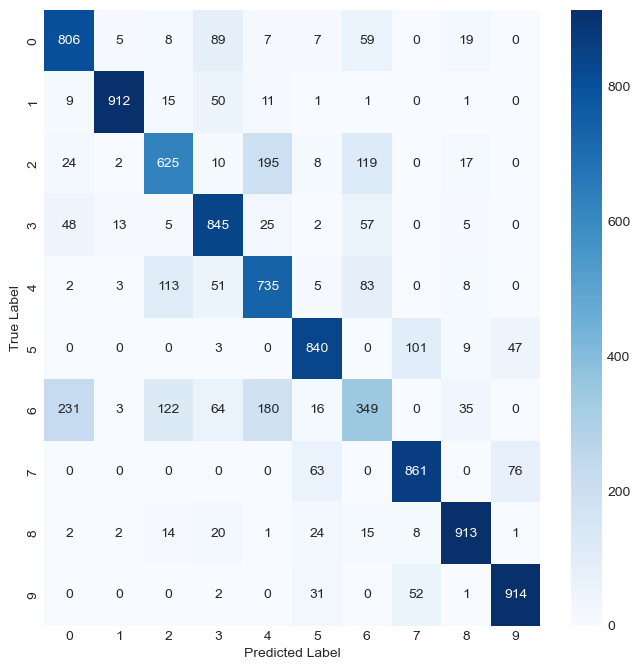

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---
# 02 모델 최적화
---

---
## 1) Early Stopping
---

In [49]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.keras', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.5933 - accuracy: 0.7946 - val_loss: 0.5861 - val_accuracy: 0.7976
Epoch 2/60
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5657 - accuracy: 0.8036 - val_loss: 0.5666 - val_accuracy: 0.8027
Epoch 3/60
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5449 - accuracy: 0.8104 - val_loss: 0.5444 - val_accuracy: 0.8113
Epoch 4/60
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5289 - accuracy: 0.8151 - val_loss: 0.5348 - val_accuracy: 0.8144
Epoch 5/60
1313/1313 [==============================] - 19s 15ms/step - loss: 0.5156 - accuracy: 0.8200 - val_loss: 0.5220 - val_accuracy: 0.8156
Epoch 6/60
1313/1313 [==============================] - 18s 14ms/step - loss: 0.5044 - accuracy: 0.8240 - val_loss: 0.5135 - val_accuracy: 0.8208
Epoch 7/60
1313/1313 [==============================] - 20s 15ms/step - loss: 0.4949 - accuracy: 0.8265 - val_loss: 0.5065 -

Epoch 57/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3763 - accuracy: 0.8660 - val_loss: 0.4121 - val_accuracy: 0.8562
Epoch 58/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3757 - accuracy: 0.8670 - val_loss: 0.4066 - val_accuracy: 0.8588
Epoch 59/60
1313/1313 [==============================] - 11s 9ms/step - loss: 0.3744 - accuracy: 0.8671 - val_loss: 0.4060 - val_accuracy: 0.8588
Epoch 60/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3737 - accuracy: 0.8670 - val_loss: 0.4124 - val_accuracy: 0.8568


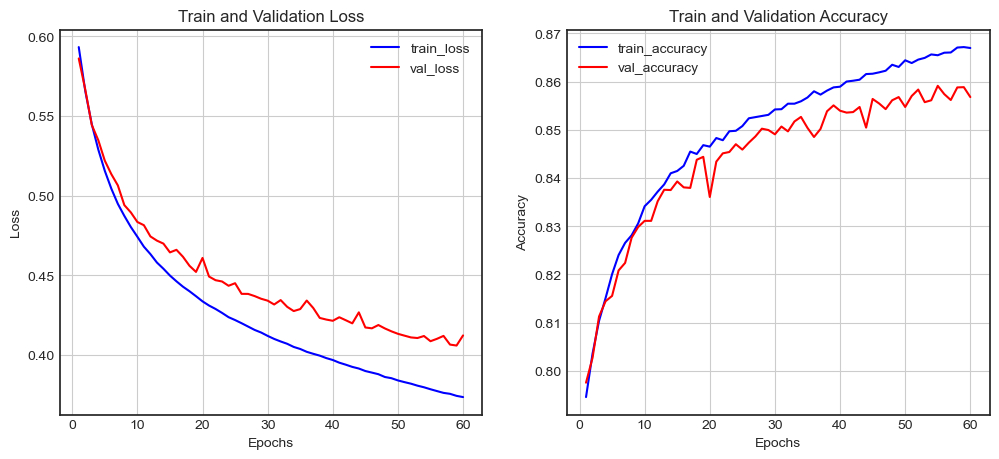

In [50]:
show_history(history)

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4338 - accuracy: 0.8437


[0.43383994698524475, 0.8436999917030334]

---
## 2) 활성화 함수
---

In [54]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 17s 12ms/step - loss: 0.7726 - accuracy: 0.7560 - val_loss: 0.5772 - val_accuracy: 0.8139
Epoch 2/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.5296 - accuracy: 0.8238 - val_loss: 0.5039 - val_accuracy: 0.8310
Epoch 3/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.4784 - accuracy: 0.8370 - val_loss: 0.4766 - val_accuracy: 0.8408
Epoch 4/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4513 - accuracy: 0.8446 - val_loss: 0.4495 - val_accuracy: 0.8481
Epoch 5/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.4314 - accuracy: 0.8513 - val_loss: 0.4493 - val_accuracy: 0.8452
Epoch 6/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4171 - accuracy: 0.8559 - val_loss: 0.4268 - val_accuracy: 0.8552
Epoch 7/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4042 - accuracy: 0.8598 - val_loss: 0.4162 - val_

Epoch 57/60
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2162 - accuracy: 0.9252 - val_loss: 0.3335 - val_accuracy: 0.8822
Epoch 58/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2150 - accuracy: 0.9251 - val_loss: 0.3158 - val_accuracy: 0.8913
Epoch 59/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2130 - accuracy: 0.9256 - val_loss: 0.3171 - val_accuracy: 0.8907
Epoch 60/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2111 - accuracy: 0.9256 - val_loss: 0.3323 - val_accuracy: 0.8858


In [56]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

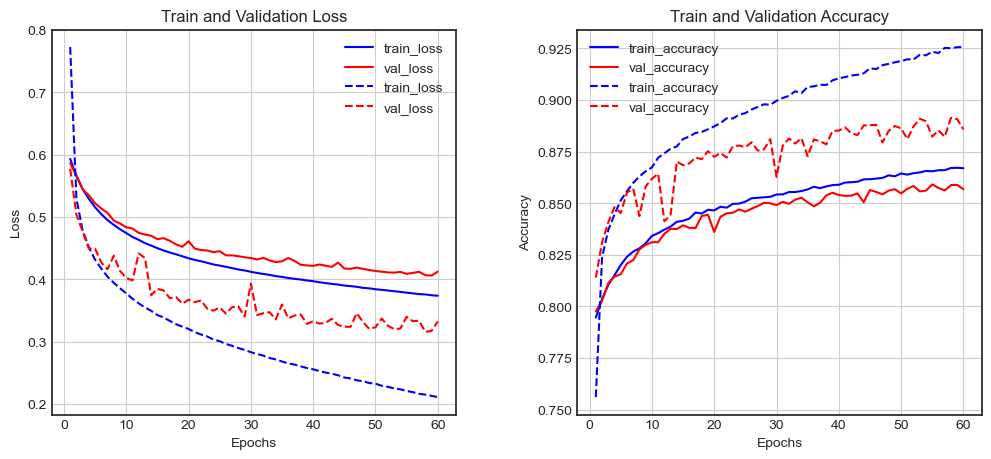

In [57]:
diff_history(history, history2)

In [58]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3554 - accuracy: 0.8726


[0.35544833540916443, 0.8726000189781189]

---
## 3) 옵티마이저
---

In [59]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy']
)

In [60]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 26s 18ms/step - loss: 0.3765 - accuracy: 0.8665 - val_loss: 0.3648 - val_accuracy: 0.8728
Epoch 2/60
1313/1313 [==============================] - 30s 23ms/step - loss: 0.3326 - accuracy: 0.8798 - val_loss: 0.3620 - val_accuracy: 0.8732
Epoch 3/60
1313/1313 [==============================] - 27s 20ms/step - loss: 0.3081 - accuracy: 0.8865 - val_loss: 0.3445 - val_accuracy: 0.8742
Epoch 4/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.2900 - accuracy: 0.8924 - val_loss: 0.3339 - val_accuracy: 0.8829
Epoch 5/60
1313/1313 [==============================] - 24s 18ms/step - loss: 0.2722 - accuracy: 0.8992 - val_loss: 0.3759 - val_accuracy: 0.8627
Epoch 6/60
1313/1313 [==============================] - 22s 17ms/step - loss: 0.2603 - accuracy: 0.9031 - val_loss: 0.3434 - val_accuracy: 0.8788
Epoch 7/60
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2500 - accuracy: 0.9076 - val_loss: 0.3504 -

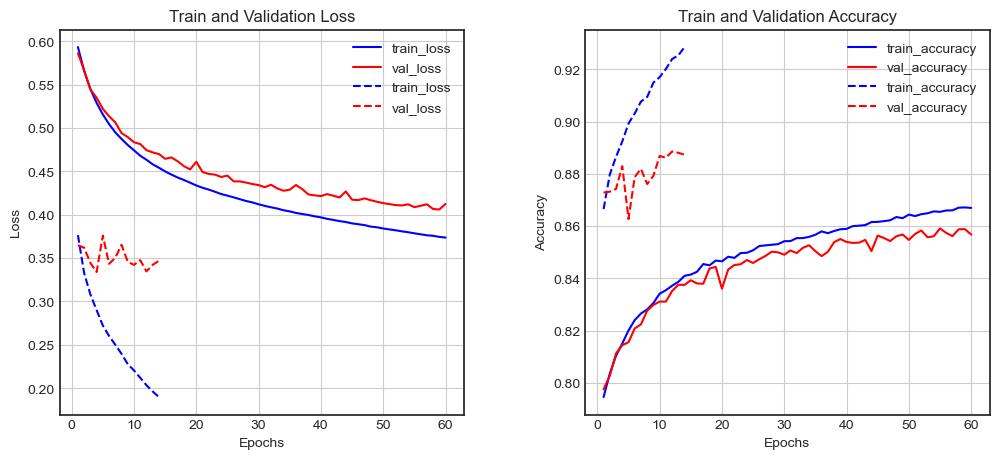

In [61]:
diff_history(history, history3)

In [62]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3575 - accuracy: 0.8740


[0.35746580362319946, 0.8740000128746033]

---
## 4) 규제
---

In [63]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 26s 20ms/step - loss: 0.5658 - accuracy: 0.8352 - val_loss: 0.5995 - val_accuracy: 0.8221
Epoch 2/60
1313/1313 [==============================] - 32s 24ms/step - loss: 0.5608 - accuracy: 0.8343 - val_loss: 0.5718 - val_accuracy: 0.8292
Epoch 3/60
1313/1313 [==============================] - 29s 22ms/step - loss: 0.5576 - accuracy: 0.8355 - val_loss: 0.5566 - val_accuracy: 0.8377
Epoch 4/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.5490 - accuracy: 0.8398 - val_loss: 0.5831 - val_accuracy: 0.8208
Epoch 5/60
1313/1313 [==============================] - 27s 20ms/step - loss: 0.5452 - accuracy: 0.8377 - val_loss: 0.5463 - val_accuracy: 0.8469
Epoch 6/60
1313/1313 [==============================] - 27s 21ms/step - loss: 0.5385 - accuracy: 0.8414 - val_loss: 0.5576 - val_accuracy: 0.8356
Epoch 7/60
1313/1313 [==============================] - 17s 13ms/step - loss: 0.5400 - accuracy: 0.8407 - val_loss: 0.5257 -

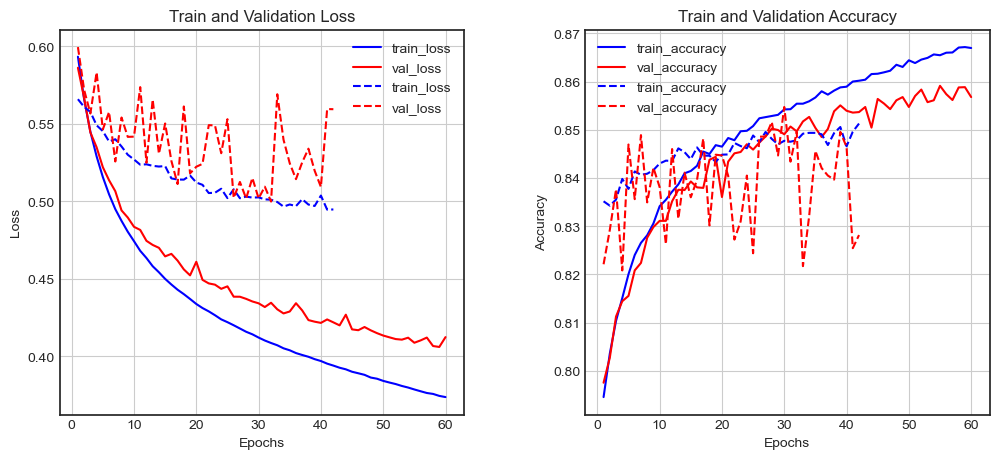

In [66]:
diff_history(history, history4)

In [67]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5146 - accuracy: 0.8417


[0.5145861506462097, 0.84170001745224]

---
## 5) 드롭아웃
---

In [68]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 26s 18ms/step - loss: 0.5883 - accuracy: 0.7901 - val_loss: 0.4419 - val_accuracy: 0.8376
Epoch 2/60
1313/1313 [==============================] - 26s 19ms/step - loss: 0.4512 - accuracy: 0.8344 - val_loss: 0.4027 - val_accuracy: 0.8507
Epoch 3/60
1313/1313 [==============================] - 23s 17ms/step - loss: 0.4158 - accuracy: 0.8474 - val_loss: 0.3919 - val_accuracy: 0.8575
Epoch 4/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.3949 - accuracy: 0.8551 - val_loss: 0.3754 - val_accuracy: 0.8632
Epoch 5/60
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3817 - accuracy: 0.8590 - val_loss: 0.3848 - val_accuracy: 0.8587
Epoch 6/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.3691 - accuracy: 0.8640 - val_loss: 0.3392 - val_accuracy: 0.8788
Epoch 7/60
1313/1313 [==============================] - 28s 21ms/step - loss: 0.3591 - accuracy: 0.8680 - val_loss: 0.3552 -

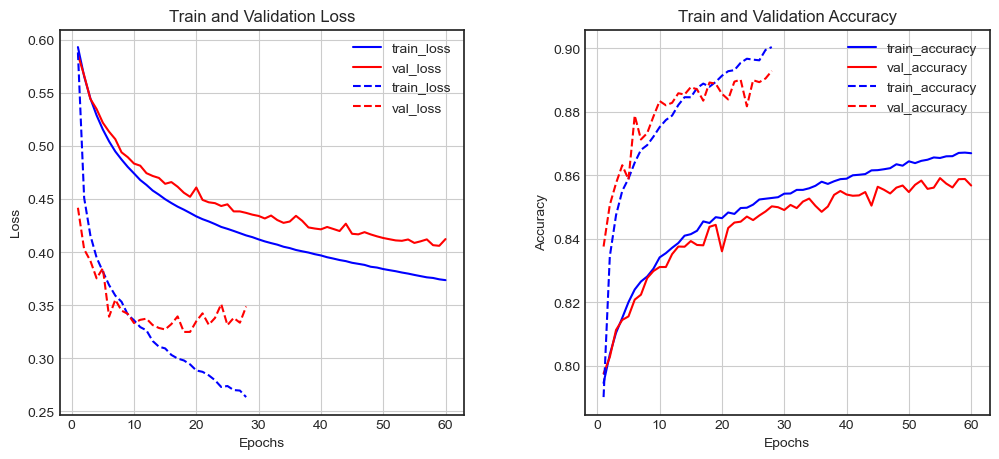

In [70]:
diff_history(history, history5)

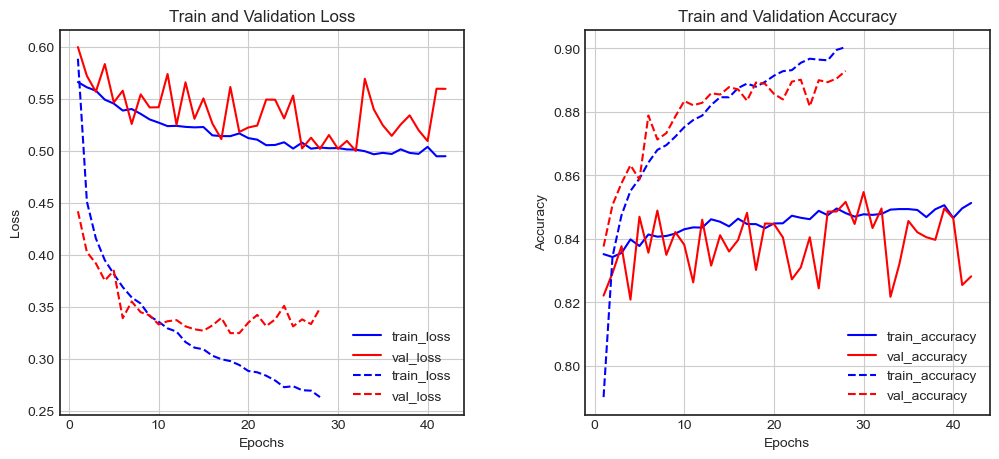

In [71]:
diff_history(history4, history5)

In [72]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3427 - accuracy: 0.8821


[0.3426661193370819, 0.882099986076355]

---
## 6) 배치 정규화
---

In [73]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [74]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 21s 14ms/step - loss: 0.4770 - accuracy: 0.8301 - val_loss: 0.4785 - val_accuracy: 0.8243
Epoch 2/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3694 - accuracy: 0.8672 - val_loss: 0.3802 - val_accuracy: 0.8658
Epoch 3/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3304 - accuracy: 0.8778 - val_loss: 0.3932 - val_accuracy: 0.8572
Epoch 4/60
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3042 - accuracy: 0.8885 - val_loss: 0.4154 - val_accuracy: 0.8495
Epoch 5/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2805 - accuracy: 0.8975 - val_loss: 0.3828 - val_accuracy: 0.8639
Epoch 6/60
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2630 - accuracy: 0.9032 - val_loss: 0.3470 - val_accuracy: 0.8799
Epoch 7/60
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2452 - accuracy: 0.9091 - val_loss: 0.4007 -

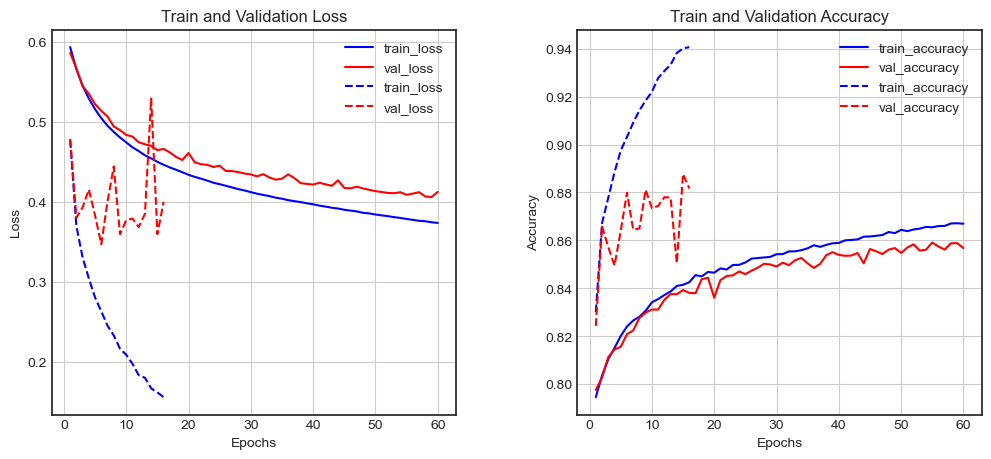

In [75]:
diff_history(history, history6)

In [76]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3685 - accuracy: 0.8706


[0.3685232102870941, 0.8705999851226807]

---
## 7) 배치 정규화 + 드롭아웃
---

In [78]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics=['accuracy']
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________

In [79]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 32s 23ms/step - loss: 0.5594 - accuracy: 0.8006 - val_loss: 0.4455 - val_accuracy: 0.8429
Epoch 2/60
1313/1313 [==============================] - 32s 24ms/step - loss: 0.4420 - accuracy: 0.8401 - val_loss: 0.3956 - val_accuracy: 0.8571
Epoch 3/60
1313/1313 [==============================] - 28s 21ms/step - loss: 0.4065 - accuracy: 0.8514 - val_loss: 0.3728 - val_accuracy: 0.8631
Epoch 4/60
1313/1313 [==============================] - 25s 19ms/step - loss: 0.3826 - accuracy: 0.8601 - val_loss: 0.3853 - val_accuracy: 0.8624
Epoch 5/60
1313/1313 [==============================] - 22s 17ms/step - loss: 0.3680 - accuracy: 0.8667 - val_loss: 0.3533 - val_accuracy: 0.8748
Epoch 6/60
1313/1313 [==============================] - 22s 17ms/step - loss: 0.3534 - accuracy: 0.8687 - val_loss: 0.3331 - val_accuracy: 0.8842
Epoch 7/60
1313/1313 [==============================] - 23s 18ms/step - loss: 0.3408 - accuracy: 0.8747 - val_loss: 0.3679 -

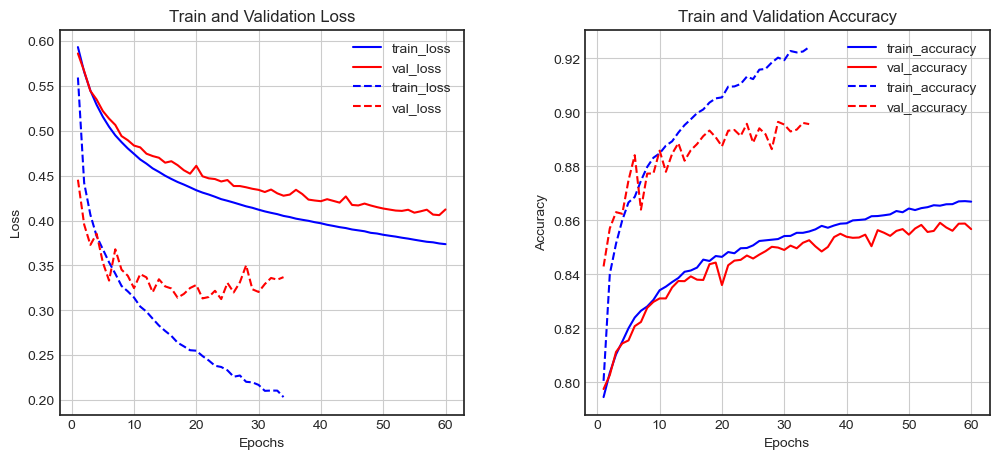

In [80]:
diff_history(history, history7)

In [81]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3366 - accuracy: 0.8870


[0.3365558087825775, 0.8870000243186951]

---
## 8) 모델 결과 분석
---

313/313 [==============================] - 2s 6ms/step


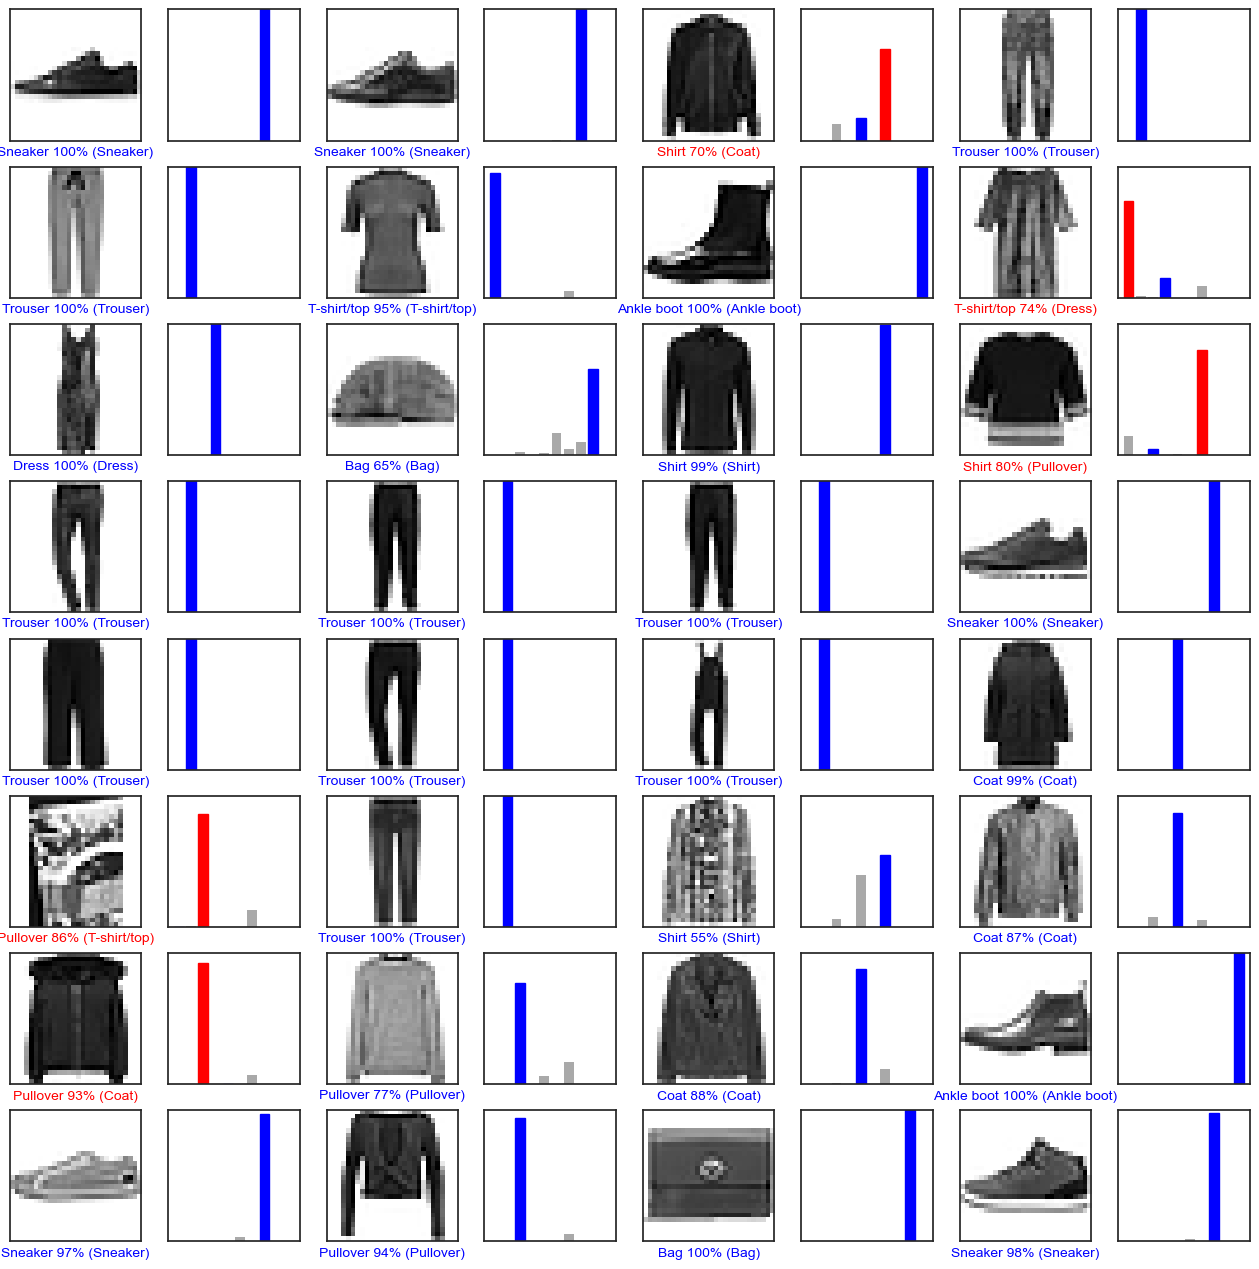

In [82]:
pred_ys = model.predict(x_test)

num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [83]:
y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.83      0.79      0.81      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.70      0.72      0.71      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



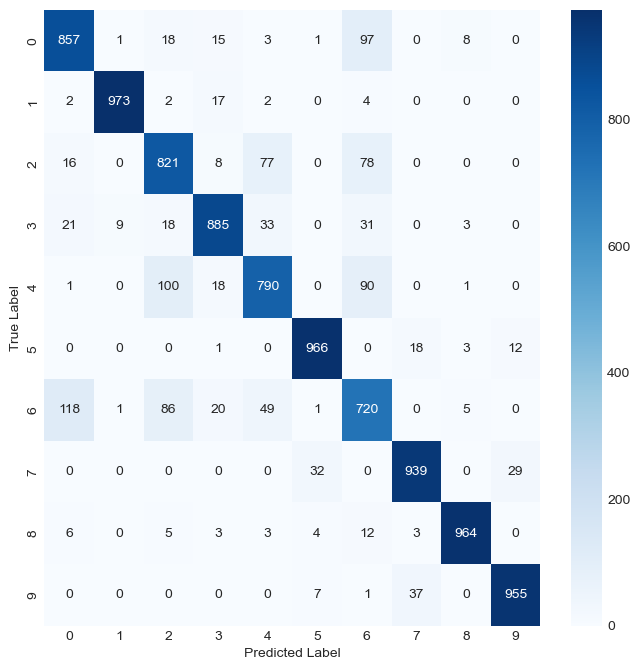

In [84]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()